Todo:
- Kolik zahraničních a kolik českých jmen se ve zkoumaným období protočilo v rádiích (tipuju že českých bude výrazně míň > z českých imho točíme dokola léta ta samá jména jen třeba s novýma písničkama)

In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

## Co v těch datech vlastně máme

In [3]:
df[['interpret_hlavni','zeme_puvodu']].sample(10)

,interpret_hlavni,zeme_puvodu
27922,David Guetta,Francie
48428,Mohombi,Konžská demokratická republika
29389,Enrique Iglesias,Španělsko
69051,Mirai,Česko
48612,Velile,Jihoafrická republika
38279,Amy Macdonald,Spojené království
61891,Atmo Music,None
7370,Fort Minor,NaN
82826,Dean Lewis,Austrálie
47654,Tinie Tempah,Spojené království


In [4]:
len(df[~df['zeme_puvodu'].isnull()]) / len(df)

0.859831214379658

To je slušný.

## Nejzastoupenější země

In [5]:
df.groupby('zeme_puvodu').size().nlargest(20)

zeme_puvodu
Spojené státy americké    22361
Česko                     19485
Spojené království        14027
Německo                    2747
Kanada                     2598
Francie                    2204
Švédsko                    2071
Slovensko                  1896
Austrálie                  1283
Nizozemsko                 1135
Španělsko                   951
Barbados                    768
Rumunsko                    741
Belgie                      693
Irsko                       592
Švýcarsko                   513
Kolumbie                    492
Finsko                      465
Itálie                      378
Singapur                    348
dtype: int64

In [6]:
def pomer(x, y):
    return (df[(df['zeme_puvodu'] == x) & (df['pozice'] <= y)].groupby('rok').size() / df[(~df['zeme_puvodu'].isnull()) & (df['pozice'] <= y)].groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

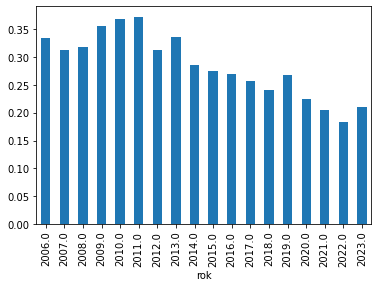

In [7]:
pomer('Spojené státy americké', 100)

<Axes: xlabel='rok'>

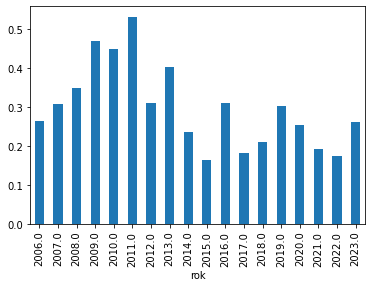

In [8]:
pomer('Spojené státy americké', 10)

<Axes: xlabel='rok'>

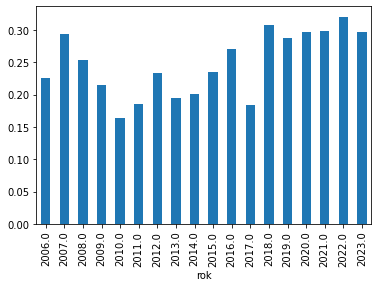

In [9]:
pomer('Česko', 100)

<Axes: xlabel='rok'>

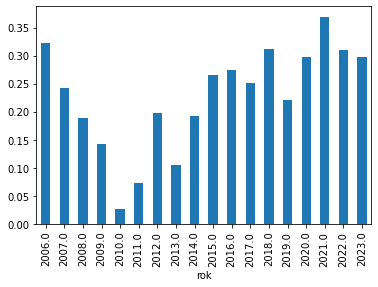

In [10]:
pomer('Česko', 10)

<Axes: xlabel='rok'>

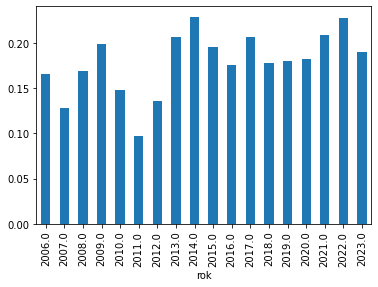

In [11]:
pomer('Spojené království', 100)

<Axes: xlabel='rok'>

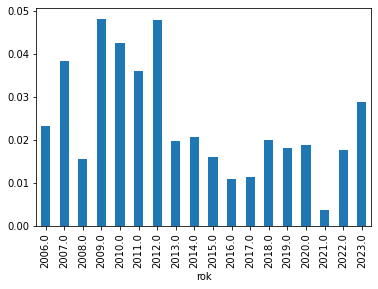

In [12]:
pomer('Slovensko', 100)

<Axes: xlabel='rok'>

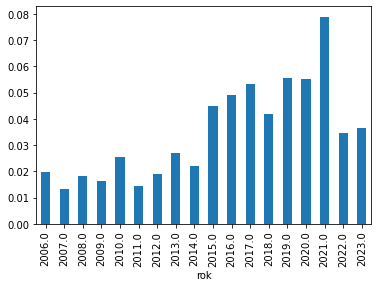

In [13]:
pomer('Německo', 100)

## Jak se točí domácí x zahraniční

In [14]:
df[~df['zeme_puvodu'].isnull() & (df['zeme_puvodu'] == "Česko")].groupby('interpret_hlavni')['track'].nunique().mean()

2.953333333333333

In [15]:
df[~df['zeme_puvodu'].isnull() & (df['zeme_puvodu'] != "Česko")].groupby('interpret_hlavni')['track'].nunique().mean()

3.3215158924205377

## Délka kariér

In [16]:
top_zeme = df.explode('zeme_puvodu').groupby('zeme_puvodu').size().nlargest(10).index.to_list()

In [17]:
df['delka_pusobeni'] = df['rok'] - df['zacatek_pusobeni']

In [18]:
df[df['zeme_puvodu'].isin(top_zeme)].groupby('zeme_puvodu')['delka_pusobeni'].mean().sort_values().head(60)

zeme_puvodu
Německo                    8.210816
Švédsko                    9.866796
Spojené království        10.094841
Kanada                    10.374465
Austrálie                 12.949099
Spojené státy americké    13.264935
Nizozemsko                14.010591
Česko                     16.885559
Slovensko                 18.902149
Francie                   19.045847
Name: delka_pusobeni, dtype: float64

Nejosvědčenější zřejmě musí být interpreti ze Slovenska, naopak ze Spojeného království je přebíráme relativně krátce po založení.

Bacha! Nemůže to nějak zkreslovat to, že jsou data až od roku 2006?

## Brno x Praha

In [19]:
len(df[df['misto_puvodu'] == 'Brno']) / len(df[df['misto_puvodu'] == 'Praha'])

0.04655493482309125

Velmi disproporční, podobně jako u filmu, ale na tahle data bych pro velké soudy nespoléhal :/

## Versus žánry

In [20]:
zanryxmista = df.explode('zanry').explode('zeme_puvodu')
zanryxmista = zanryxmista[['zanry','zeme_puvodu']].dropna()

Vyřazuji z toho pop.

In [21]:
pd.DataFrame(zanryxmista[~zanryxmista['zanry'].str.contains('pop',na=False)].groupby(['zeme_puvodu','zanry']).size().nlargest(30)).rename(columns={0:'count'})

count
zeme_puvodu            zanry                            
Spojené státy americké hip hop                      7250
                       contemporary R&B             6637
                       alternativní rock            4666
                       rock                         3758
Česko                  rock                         3155
Spojené státy americké elektronická taneční hudba   2566
                       taneční hudba                2232
Spojené království     alternativní rock            2104
Spojené státy americké soul                         2049
                       rhythm and blues             1898
Spojené království     soft rock                    1850
Spojené státy americké reggae                       1728
Česko                  alternativní rock            1688
Spojené státy americké elektronická hudba           1668
Spojené království     contemporary R&B             1547
                       rock                         1522
Spojené státy americké trap                         1504
                       electro house                1402
                       country                      1289
                       funk                         1288
Spojené království     soul                         1267
Spojené státy americké house music                  1254
Spojené království     hip hop                      1242
                       house music                  1218
Spojené státy americké Southern hip hop             1182
                       gospel                       1178
Spojené království     rhythm and blues             1175
Spojené státy americké reggaeton                    1157
                       hip house                    1155
                       dirty south                  1145

In [33]:
pro_clanek = zanryxmista[(zanryxmista['zeme_puvodu'].isin(['Česko','Spojené státy americké','Spojené království'])) & (zanryxmista['zanry'] != 'pop music')].reset_index()

In [34]:
pro_clanek.groupby(['zeme_puvodu','zanry'])['index'].nunique().nlargest(20)

zeme_puvodu             zanry                     
Spojené státy americké  pop rock                      7529
                        hip hop                       7250
                        contemporary R&B              6637
                        elektropop                    5364
                        dance-pop                     4925
                        alternativní rock             4666
                        rock                          3758
Česko                   rock                          3155
Spojené státy americké  synthpop                      3047
                        pop rap                       2766
                        elektronická taneční hudba    2566
                        taneční hudba                 2232
Spojené království      pop rock                      2130
                        alternativní rock             2104
                        synthpop                      2072
Spojené státy americké  soul                          2049
Česko